Loading data :

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

Classes and balance :

In [2]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

In [3]:
178/570

0.312280701754386

Dummy classifier :
* First with no particular scoring
* Second with `"balanced_accuracy"` scoring

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

dummy_model = DummyClassifier(strategy="most_frequent")

cv_results = cross_validate(
    dummy_model, data, target, cv=5
)
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score
0,0.000000,0.0,0.760000
1,0.007995,0.0,0.760000
2,0.000000,0.0,0.760000
3,0.000000,0.0,0.765101
4,0.000000,0.0,0.765101


In [5]:
cv_results["test_score"].mean()

0.7620402684563758

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

dummy_model = DummyClassifier(strategy="most_frequent")

cv_results = cross_val_score(
    dummy_model, data, target, cv=5, scoring="balanced_accuracy"
)
cv_results

array([0.5, 0.5, 0.5, 0.5, 0.5])

Pipeline with :
* Standard scaler
* Default KNeighborsClassifier

In [7]:
data.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [8]:
from sklearn import set_config
set_config(display='diagram')

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

model = make_pipeline(StandardScaler(), KNeighborsClassifier())


Default `"n_neighbors"` parameter for a KNeighborsClassifier :

In [10]:
model.get_params()["kneighborsclassifier__n_neighbors"]

5

In [11]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))

cv_results = cross_validate(
    model, data, target, cv=10, scoring="balanced_accuracy", return_train_score=True
)
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score,train_score
0,0.010982,0.008094,0.513158,0.890856
1,0.008062,0.007929,0.491228,0.891429
2,0.008004,0.007998,0.391813,0.892032
3,0.008072,0.000000,0.333333,0.898855
4,0.008013,0.000000,0.394737,0.894956
5,0.001818,0.005181,0.438596,0.878728
6,0.000000,0.010241,0.564327,0.879733
7,0.000000,0.008011,0.611111,0.877010
8,0.010319,0.000000,0.456656,0.886613
9,0.001997,0.007840,0.532508,0.889767


Validation curve on `"n_neighbors"` :

In [12]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [13]:
from sklearn.model_selection import validation_curve

model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
param_name = "kneighborsclassifier__n_neighbors"
train_scores, test_scores = validation_curve(
    model, data, target, param_name=param_name, param_range=param_range,
    cv=5, scoring="balanced_accuracy", n_jobs=2
)

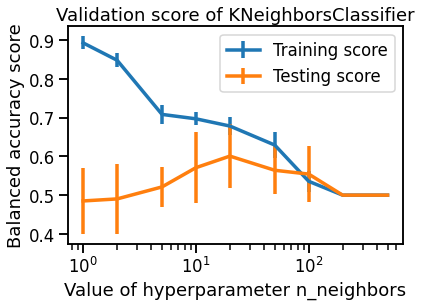

In [14]:
import matplotlib.pyplot as plt

plt.errorbar(param_range, train_scores.mean(axis=1),
             yerr=train_scores.std(axis=1), label='Training score')
plt.errorbar(param_range, test_scores.mean(axis=1),
             yerr=test_scores.std(axis=1), label='Testing score')
plt.legend()

plt.xscale("log")
plt.xlabel(f"Value of hyperparameter n_neighbors")
plt.ylabel("Balanced accuracy score")
_ = plt.title("Validation score of KNeighborsClassifier")

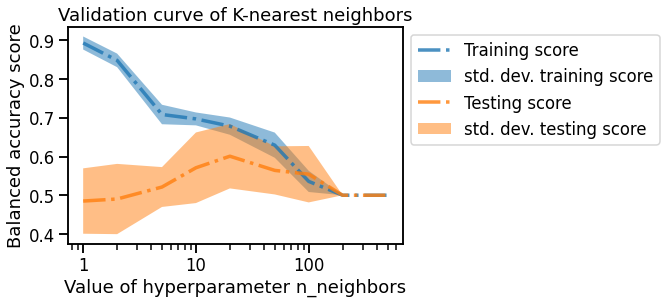

In [15]:
# Solution
from sklearn.model_selection import validation_curve
import matplotlib
import matplotlib.pyplot as plt

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
param_name = "kneighborsclassifier__n_neighbors"
train_scores, test_scores = validation_curve(
    model, data, target, param_name=param_name, param_range=param_range, cv=5,
    n_jobs=2, scoring="balanced_accuracy")

_, ax = plt.subplots()
for name, scores in zip(
    ["Training score", "Testing score"], [train_scores, test_scores]
):
    ax.plot(
        param_range, scores.mean(axis=1), linestyle="-.", label=name,
        alpha=0.8)
    ax.fill_between(
        param_range, scores.mean(axis=1) - scores.std(axis=1),
        scores.mean(axis=1) + scores.std(axis=1),
        alpha=0.5, label=f"std. dev. {name.lower()}")

ax.set_xticks(param_range)
ax.set_xscale("log")
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel("Value of hyperparameter n_neighbors")
ax.set_ylabel("Balanced accuracy score")
ax.set_title("Validation curve of K-nearest neighbors")
_ = ax.legend(bbox_to_anchor=(1., 1.))